In [1]:
# Read in existing demo

import pickle

olddemo = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/demographics.pkl', 'rb'))

print('Done')

Done


In [2]:
newdemo = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2/demographics.pkl', 'rb'))

print('Done')

Done


In [3]:
# Correlates and lifestyle factors
# Age and sex first
# Some fields like tobacco use are categorical but might be better coded as continuous
# PRS AD is in UKB2 while all other fields are in UKB3

import os

desc = ['Age', 'Sex', 'Waist Circumference', 'Height', 
        'Pulse Rate', 'Days Vigorous Physical Activity',
        'Time Spent Outdoors Summer', 'Time Spent Outdoors Winter', 'Time Spent Watching TV', 'Sleep Duration',
        'Nap During Day', 'Daytime Drowsiness', 'Current tobacco use', 'Past Tobacco Use',
        'Overall Health Rating', 'Diabetes', 
        'Diastolic BP', 'Systolic BP',
        'BMI', 'Basal Metabolic Rate', 'Body Impedance', 'RBC Count',
        'Hemoglobin Concentration', 'Apolipoprotein A', 'Cholesterol',
        'PRS AD', 'Alcohol Consumption', 'Hand Grip Strength (right)'
       ]
fields = ['f_21003_2_0', 'f_31_0_0', 'f_48_0_0', 'f_50_0_0', 
          'f_102_0_0', 'f_904_0_0', 
          'f_1050_0_0', 'f_1060_0_0', 'f_1070_0_0', 'f_1160_0_0',
          'f_1190_0_0', 'f_1220_0_0', 'f_1239_0_0', 'f_1249_0_0',
          'f_2178_0_0', 'f_2443_0_0', 
          'f_4079_0_0', 'f_4080_0_0', 
          'f_21001_0_0', 'f_23105_0_0', 'f_23106_0_0', 'f_30010_0_0',
          'f_30020_0_0', 'f_30630_0_0', 'f_30690_0_0', 
          '26206-0.0', 'f_1558_0_0', 'f_46_0_0'
         ]
types = ['continuous', 'categorical', 'continuous', 'continuous',
         'continuous', 'continuous', 
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'categorical', 
         'continuous', 'continuous',
         'continuous', 'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous',
         'continuous', 'continuous', 'continuous'
        ]

init = True
inter_subs = set()

for field in fields:
    if field == '26206-0.0':
        subs = set(newdemo[field].keys())
    else:
        subs = set(olddemo[field].keys())
    if init:
        init = False
        inter_subs = subs
    else:
        inter_subs = inter_subs.intersection(subs)
        
print(len(inter_subs))

inter_subs_fc = set()

for sub in inter_subs:
    if os.path.isfile(f'/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/conn/{sub}_task-20227-2_fc.npy'):
        inter_subs_fc.add(sub)

print(len(inter_subs_fc))

29466
29466


In [4]:
import numpy as np

fcs = []
demos = [[] for field in fields]
count = 0

for sub in inter_subs_fc:
    count += 1
    for i in range(len(fields)):
        if i == 25:
            val = newdemo[fields[i]][sub]
        else:
            val = olddemo[fields[i]][sub]
        demos[i].append(val)
    p = np.load(f'/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB3/conn/{sub}_task-20227-2_fc.npy')
    fcs.append(p)
    if count % 1000 == 0:
        print(f'Done {count}')
    if count == 1000:
        break

fcs = np.stack(fcs)
demos = [np.array(demo) for demo in demos]

# for i in range(len(types)):
#     if types[i] == 'continuous':
#         demos[i] = (demos[i]-np.mean(demos[i]))/np.std(demos[i])

print('Done')

Done 1000
Done


In [5]:
for i in range(len(types)):
    print(i, desc[i])

0 Age
1 Sex
2 Waist Circumference
3 Height
4 Pulse Rate
5 Days Vigorous Physical Activity
6 Time Spent Outdoors Summer
7 Time Spent Outdoors Winter
8 Time Spent Watching TV
9 Sleep Duration
10 Nap During Day
11 Daytime Drowsiness
12 Current tobacco use
13 Past Tobacco Use
14 Overall Health Rating
15 Diabetes
16 Diastolic BP
17 Systolic BP
18 BMI
19 Basal Metabolic Rate
20 Body Impedance
21 RBC Count
22 Hemoglobin Concentration
23 Apolipoprotein A
24 Cholesterol
25 PRS AD
26 Alcohol Consumption
27 Hand Grip Strength (right)


In [109]:
# Choose demographic fields
# Since the model is unstable with more than about 5
# Keep age, sex, waist, and height in all demos and just vary the last one

nums = [0, 1, 2, 3, 18]
special_demo = fields[nums[-1]]

reduced_demos = [demos[i] for i in nums]
reduced_types = [types[i] for i in nums]

print(len(reduced_demos))
print(special_demo)

5
f_21001_0_0


In [110]:
# Perform least squares fitting

from sklearn.linear_model import Ridge

x = np.stack(reduced_demos)
x = x.transpose()

reg = Ridge(alpha=1).fit(x, fcs)
yhat = reg.predict(x)

print(yhat.shape)
print('Done')

(1000, 34716)
Done


In [70]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


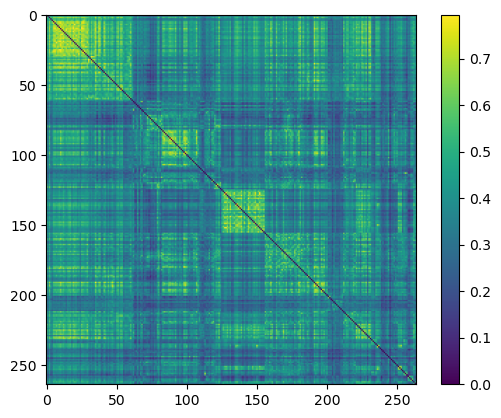

In [71]:
import matplotlib.pyplot as plt

plt.imshow(vec2mat(yhat[10]))
plt.colorbar()
plt.show()

In [72]:
# Load ADNI model

import pickle

# adni = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/weights0.pkl', 'rb'))
adni = {'coef': None, 'intercept': 0}
adni['coef'] = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/corrBalanced.pkl', 'rb'))

list(adni.keys())

['coef', 'intercept']

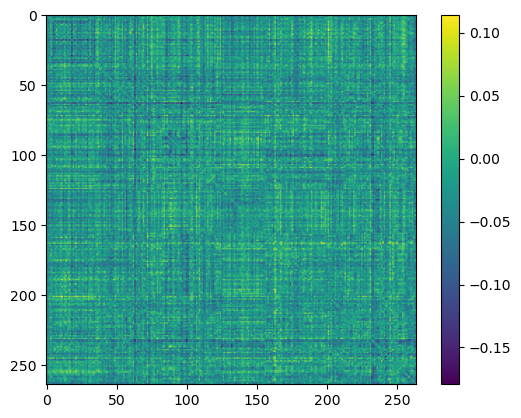

In [114]:
xx = x+0
xx[:,4] += 9

yhat2 = reg.predict(xx)

plt.imshow(vec2mat(np.mean(yhat2-yhat, axis=0)))
plt.colorbar()
plt.show()

In [116]:
b = adni['intercept']
w = adni['coef']
logits_base = 0
logits_int = 0

for p in yhat:
    logits = b+np.sum(p*w)
    logits_base += logits/len(yhat)

for p in yhat2:
    logits = b+np.sum(p*w)
    logits_int += logits/len(yhat2)

print(logits_int - logits_base)

13.354044322575959


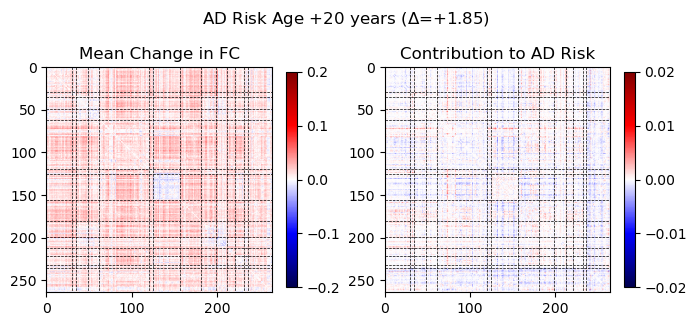

In [88]:
# Make two graphs: one mean change in FC, the other mean change in AD risk
# Use seismic or RdBu colormaps

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def getlabel(i):
    for j in range(len(divis)):
        if i >= divis[j] and i < divis[j+1]:
            return labels[j]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(1,2,figsize=(8,3.5))

subject = 'Age +20 years'
delta = '+1.85'
diff = (np.mean(yhat2, axis=0)-np.mean(yhat, axis=0))/3
diffw = w*diff
tit = subject.replace(' ', '_')
scale = 0.2

norm1 = TwoSlopeNorm(vmax=scale, vmin=-scale, vcenter=0)
norm2 = TwoSlopeNorm(vmax=scale/10, vmin=-scale/10, vcenter=0)

pos = ax[0].imshow(vec2mat(diff), norm=norm1, cmap='seismic')
fig.colorbar(pos, ax=ax[0], shrink=0.8)

pos = ax[1].imshow(vec2mat(diffw), norm=norm2, cmap='seismic')
fig.colorbar(pos, ax=ax[1], shrink=0.8)

for i in range(len(divis)-1):
    d = divis[i+1]
    ax[0].plot([0, 264], [d, d], color='black', linewidth=0.5, linestyle='--')
    ax[0].plot([d, d], [0, 264], color='black', linewidth=0.5, linestyle='--')
    ax[1].plot([0, 264], [d, d], color='black', linewidth=0.5, linestyle='--')
    ax[1].plot([d, d], [0, 264], color='black', linewidth=0.5, linestyle='--')

ax[0].set_xlim([0,264])
ax[0].set_ylim([264,0])
ax[1].set_xlim([0,264])
ax[1].set_ylim([264,0])

ax[0].set_title('Mean Change in FC')
ax[1].set_title('Contribution to AD Risk')

fig.suptitle(f'AD Risk {subject} ($\\Delta$={delta})')
fig.show()
fig.savefig(f'/home/anton/Documents/Yale/UKB/Figures/FCChanges/{tit}.pdf')

In [117]:
# Get synthetic subjects with same demos as real group

real_g1 = []
real_g2 = []

for i in range(len(x)):
    val = x[i,4]
    if val < 23:
        real_g1.append(fcs[i])
    elif val > 28:
        real_g2.append(fcs[i])

real_g1_mu = np.mean(real_g1, axis=0)
real_g2_mu = np.mean(real_g2, axis=0)

print(real_g1_mu.shape)

(34716,)


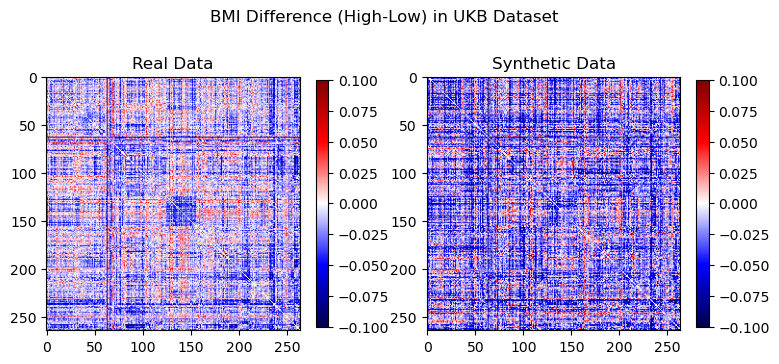

In [118]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def getlabel(i):
    for j in range(len(divis)):
        if i >= divis[j] and i < divis[j+1]:
            return labels[j]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

norm = TwoSlopeNorm(vmax=0.1, vmin=-0.1, vcenter=0)

fig, ax = plt.subplots(1,2,figsize=(9,4))

real_mean = real_g2_mu-real_g1_mu
synth_mean = np.mean(yhat2, axis=0) - np.mean(yhat, axis=0)

pos = ax[0].imshow(vec2mat(real_mean), cmap='seismic', norm=norm)
fig.colorbar(pos, ax=ax[0], shrink=0.8)

pos = ax[1].imshow(vec2mat(synth_mean), cmap='seismic', norm=norm)
fig.colorbar(pos, ax=ax[1], shrink=0.8)

ax[0].set_title('Real Data')
ax[1].set_title('Synthetic Data')

fig.suptitle('BMI Difference (High-Low) in UKB Dataset')
fig.show()
fig.savefig('/home/anton/Documents/Yale/UKB/Figures/RealSynthBMI.pdf')